# Customer Churn Prediction (Logistic Regression)
### by Diptorshi Tripathi, VIT-AP University

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
# Loading the dataset.
df = pd.read_csv("Churn_Modelling.csv")

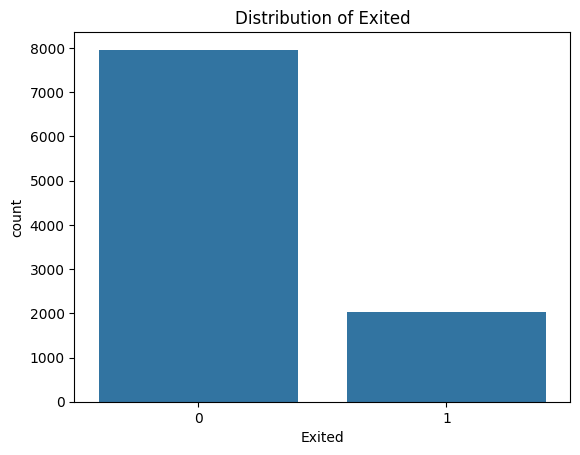

In [10]:
# A simple visual representation of the ratio of Exited churns.
sns.countplot(data=df, x='Exited')
plt.title('Distribution of Exited')
plt.show()

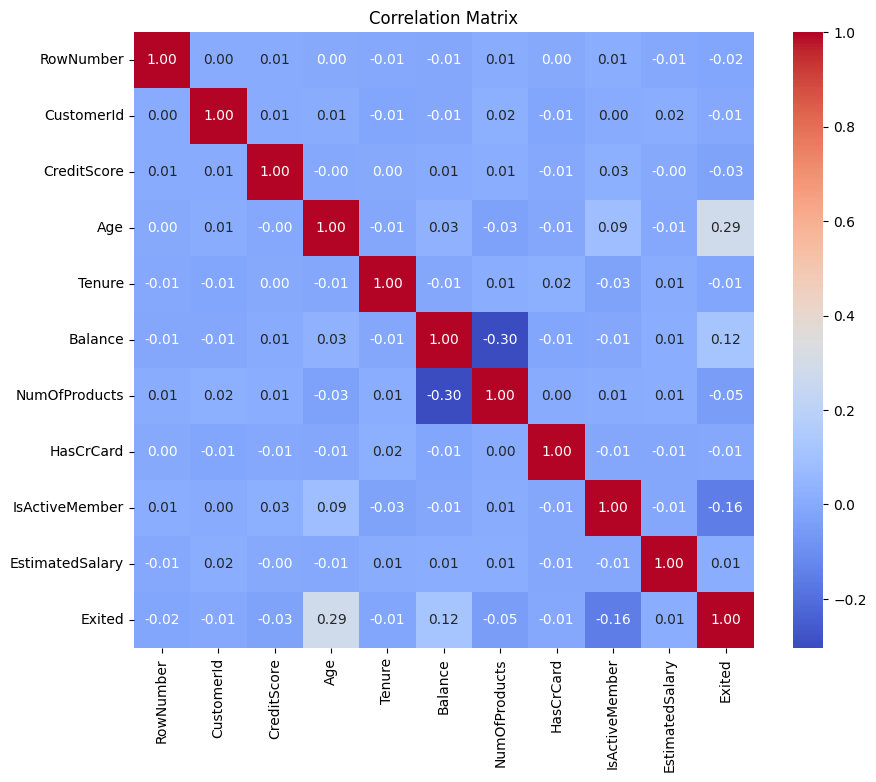

In [11]:
# Removing nonnumeric data from columns.
numeric_cols = df.select_dtypes(include=['number']).columns
corr_matrix = df[numeric_cols].corr()

# Visualizing using heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

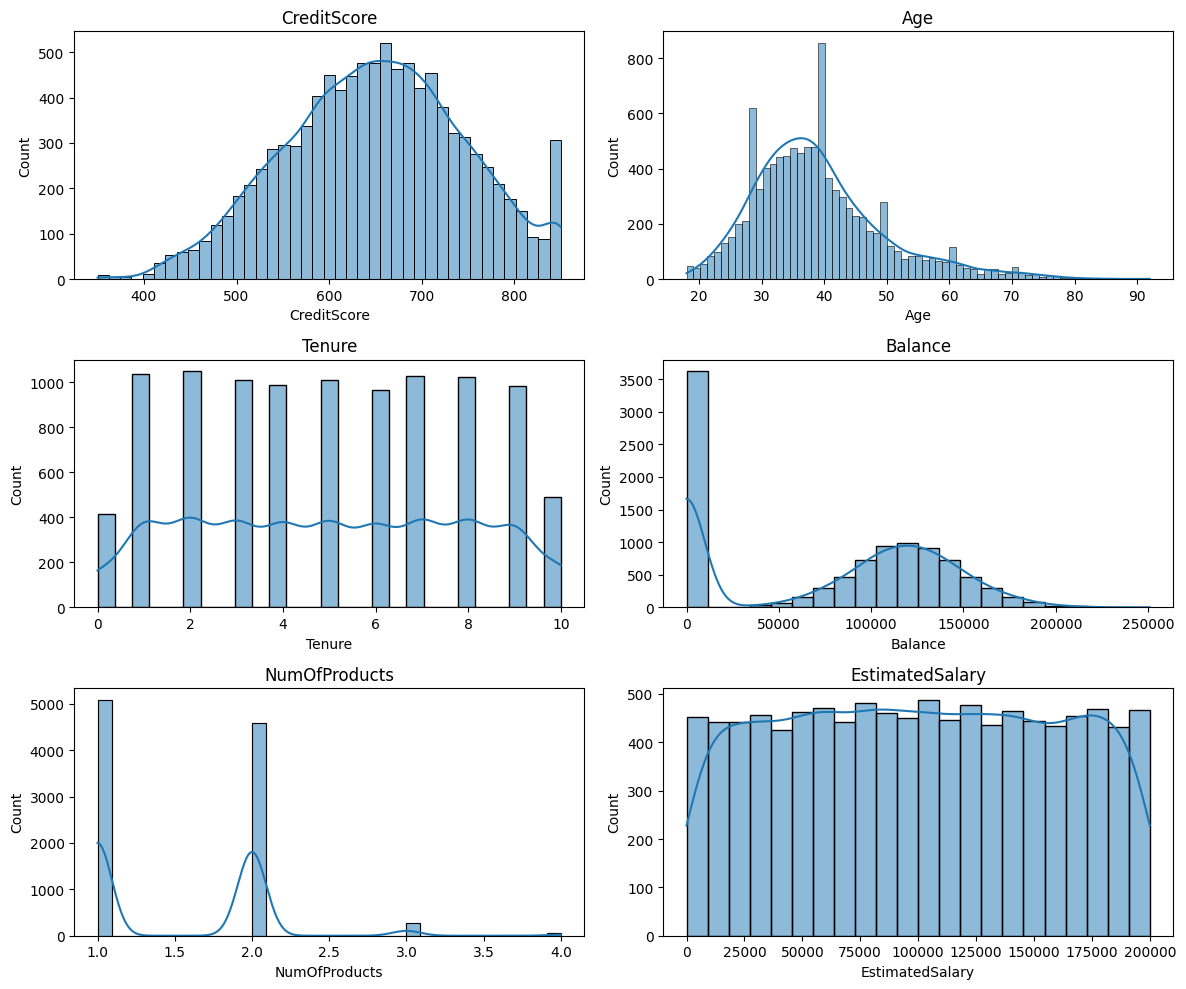

In [36]:
# Visualizing all the numeric information.
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
plt.figure(figsize=(12, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [37]:
# Preprocessing the data.
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Function to Evaluate the model, and testing it.
def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nTesting Logistic Regression Model:")
test_model(logreg, X_test, y_test)


Testing Logistic Regression Model:
Accuracy: 0.815
Confusion Matrix:
 [[1559   48]
 [ 322   71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [38]:
# Function to predict new data, dropping unnecessary columns and cleaning the data.
def newpredict(model, newdatafile):
    new_data = pd.read_csv(newdatafile)
    new_data['Geography'] = new_data['Geography'].replace(new_data['Geography'].unique(), df['Geography'].mode()[0])
    new_data['Gender'] = new_data['Gender'].replace(new_data['Gender'].unique(), df['Gender'].mode()[0])
    new_data['Geography'] = pd.factorize(new_data['Geography'])[0]
    new_data['Gender'] = pd.factorize(new_data['Gender'])[0]
    new_data = new_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
    newdatascaled = sc.transform(new_data)
    predictions = model.predict(newdatascaled)
    return predictions

# A sample usage of the function.
print(newpredict(logreg, 'sample1.csv'))

[0]
